                                        CREDIT SCORING MODEL
                * Build a credit scoring model to predict the creditworthiness of applicants.\n
                * Use features like income, debt, and credit history.

Import Libraries & Load Data

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [82]:
data = pd.read_csv('credit_data.csv')

Data Processing

In [83]:
print("Processing data...")

numeric_features = ['income', 'age', 'loan']
categorical_features = ['credit_history']

print("\n",data.dtypes)

numeric_imputer = SimpleImputer(strategy='median')
data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])

# Encode categorical column separately
data['credit_history'] = data['credit_history'].map({
    'good': 1,
    'critical account/ other credits existing (not at this bank)': 0,
    'all credits at this bank paid back duly': 2,
    'delay in paying off in the past': 3
})


if data['credit_history'].isnull().sum() > 0:
    data['credit_history'].fillna(0, inplace=True)


X = data[['income', 'age', 'loan', 'credit_history']]
y = data['default']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\n")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing and scaling completed successfully!")

Processing data...

 clientid            int64
income            float64
age               float64
loan              float64
default             int64
credit_history     object
dtype: object


Preprocessing and scaling completed successfully!


In [84]:
print(f'X_train_scaled type: {type(X_train_scaled)}') 
print(f'y_train type: {y_train.dtype}') 

X_train_scaled type: <class 'numpy.ndarray'>
y_train type: int64


Model Training & Evaluation

In [85]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [86]:
y_pred = rf_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       508
           1       1.00      0.91      0.95        92

    accuracy                           0.99       600
   macro avg       0.99      0.96      0.97       600
weighted avg       0.99      0.99      0.99       600



Confusion Matrics

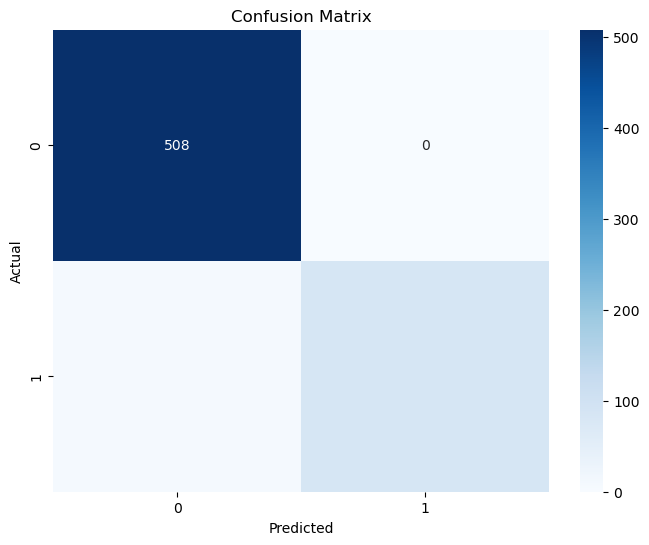

In [87]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Prediction

In [89]:
new_data = pd.DataFrame({
    'income': [50000, 75000],       
    'age': [35, 50],               
    'loan': [15000, 25000],          
    'credit_history': ['good', 'bad'] 
})


new_data['credit_history'] = new_data['credit_history'].map({
    'good': 1,
    'critical account/ other credits existing (not at this bank)': 0,
    'all credits at this bank paid back duly': 2,
    'delay in paying off in the past': 3,
    'bad': 0 
})

if new_data['credit_history'].isnull().sum() > 0:
    new_data['credit_history'].fillna(0, inplace=True)


new_data = new_data[['income', 'age', 'loan', 'credit_history']]

new_data_scaled = scaler.transform(new_data)

predictions = rf_clf.predict(new_data_scaled)

print("Predictions for new data:", predictions)


Predictions for new data: [0 0]


As a result:

Applicant 1 and Applicant 2 are both predicted to not default on their credit obligations based on the model’s output.

This result indicates that the model assesses both individuals as having a lower risk of defaulting.